In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score

In [2]:
r="winequality-red.csv"
datos=pd.read_csv(r,sep=";")

In [3]:
X=datos.drop(["quality"],axis=1).values
y=datos["quality"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=397)
X_test.shape

(320, 11)

Normalización de los datos

In [4]:
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

Entrenamiento y desempeño del modelo

In [5]:
mlp= MLPClassifier(hidden_layer_sizes=(4),activation="tanh",max_iter=500)
mlp.fit(X_train_scaled,y_train)

predict= mlp.predict(X_test_scaled)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[  0   0   1   0   0   0]
 [  0   0   3   1   0   0]
 [  0   0 105  39   1   0]
 [  0   0  58  61   2   0]
 [  0   0   5  30  11   0]
 [  0   0   0   3   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         4
          5       0.61      0.72      0.66       145
          6       0.46      0.50      0.48       121
          7       0.79      0.24      0.37        46
          8       0.00      0.00      0.00         3

avg / total       0.56      0.55      0.53       320



C:\Users\EEIE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


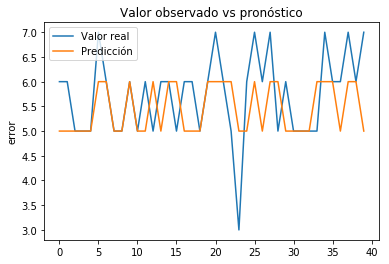

In [6]:
plt.plot(y_test[:40], label='Valor real')
plt.plot(predict[:40], label='Predicción')
plt.title("Valor observado vs pronóstico")
plt.ylabel('error')
plt.legend(loc=2)
plt.show()

precision= del total pronósticado cuantos realmente correspondian a esa 
categoría 107/176=0.61. Para recall son cuantos se pronosticaron de esa 
categoria y realmente pertenecian a ella

Pesos sinápticos y umbrales

In [8]:
pesos=mlp.coefs_
umbrales=mlp.intercepts_
print("Pesos sinápticos en las capas:")
print(pesos)

print("Umbrales:")
print(umbrales)


Pesos sinápticos en las capas:
[array([[ 0.50174862,  0.34605031, -0.31230209, -0.16819965],
       [ 0.39071927, -0.13027458,  0.41109966, -0.27724883],
       [ 0.31710298, -0.03624049, -0.01252836,  0.09246619],
       [ 0.32381515,  0.24014784, -0.15610168,  0.04522714],
       [-0.3253832 , -0.16774001,  0.2755247 , -0.2864816 ],
       [-0.39790633, -0.12357005, -0.19347791, -0.25351706],
       [-0.12314706, -0.2786867 ,  0.23038977,  0.56205478],
       [-0.40850611, -0.27814098,  0.48626535, -0.20723504],
       [ 0.55035211,  0.12991849,  0.11998581, -0.3042059 ],
       [-0.59349015,  0.0776758 , -0.5959301 , -0.017186  ],
       [-0.22117296,  0.55431721, -0.44156704,  0.09774944]]), array([[ 1.16068952,  1.62082428,  0.27165841, -0.87189336, -0.12425689,
         0.93716258],
       [-0.33830234, -0.66933287, -1.02738941,  0.88345597,  1.43391163,
        -0.62612242],
       [ 0.32089051,  0.76956456,  1.19347779,  0.61297725, -1.21306321,
        -1.61736509],
       [-1